## Importing libraries and reading data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 


In [2]:
data1 = pd.read_csv('AB_NYC_2019.csv')
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


## Categorization:

##### Categorizing the "availability_365" column into 5 categories:

In [3]:
def availability_365_cat_func(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'Very High'

In [4]:
data1['availability_365_categories'] = data1.availability_365.map(availability_365_cat_func)
data1['availability_365_categories']

0        Very High
1        Very High
2        Very High
3           Medium
4         Very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [5]:
data1['availability_365_categories'].value_counts()

Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

##### Categorizing  the "minimum_nights" column into 5 categories:

In [6]:
def min_night_cat_func(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'Very High'

In [7]:
data1['minimum_night_categories'] = data1.minimum_nights.map(min_night_cat_func)
data1['minimum_night_categories']

0         Very Low
1         Very Low
2              Low
3         Very Low
4        Very High
           ...    
48890          Low
48891       Medium
48892    Very High
48893     Very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [8]:
data1.minimum_night_categories.value_counts()

Low          19695
Very Low     12720
Very High     7333
Medium        6337
High          2810
Name: minimum_night_categories, dtype: int64

#####  Categorizing  the "number_of_reviews" column into 5 categories:

In [9]:
def number_of_reviews_cat_func(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'Very High'

In [10]:
data1['number_of_reviews_categories'] = data1.minimum_nights.map(number_of_reviews_cat_func)
data1['number_of_reviews_categories']

0        Very Low
1        Very Low
2             Low
3        Very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    Very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

In [11]:
data1.number_of_reviews_categories.value_counts()

Low          26032
Very Low     12720
High          5893
Medium        3503
Very High      747
Name: number_of_reviews_categories, dtype: int64

#####  Categorizing the "price" column into 5 categories:

In [12]:
def price_cat_func(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'Very High'

In [13]:
data1['price_categories'] = data1.minimum_nights.map(price_cat_func)
data1['price_categories']

0        Very Low
1        Very Low
2             Low
3        Very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    Very Low
48894      Medium
Name: price_categories, Length: 48895, dtype: object

## EDA:

In [14]:
## let's check null counts and data types:

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
## let's change dtype of last_review to Datetime:

data1.last_review = pd.to_datetime(data1.last_review)
data1.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### now it's perfect. No other datatype to be changed:

## Categorical Data Types:

In [17]:
data1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [18]:
## let's differentiate categorical columns:

categorical_columns = data1.columns[[0, 1, 3,4,5,8,16,17,18,19]]
categorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [19]:
# displaying categorical columns:

data1[categorical_columns].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,Very Low,Very High,Medium,Medium


##### doing same thing for numerical data types:

## Numerical Data Types:

In [20]:
numerical_columns = data1.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [21]:
data1[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [22]:
data1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Coordinates and Dates:

In [23]:
coordinates = data1.columns[[5,6,12]]
data1[coordinates]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,2018-10-19
1,Midtown,40.75362,2019-05-21
2,Harlem,40.80902,NaT
3,Clinton Hill,40.68514,2019-05-07
4,East Harlem,40.79851,2018-11-19
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaT
48891,Bushwick,40.70184,NaT
48892,Harlem,40.81475,NaT
48893,Hell's Kitchen,40.75751,NaT


### checking missing values:

In [24]:
data1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

In [25]:
round(data1.isnull().sum() / len(data1) * 100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
availability_365_categories        0.00
minimum_night_categories           0.00
number_of_reviews_categories       0.00
price_categories                   0.00
dtype: float64

- last_review and reviews_per_month has highest 20.56% missing values.
- Here in this case study the main thing is, we're not going to develope any model so no need to drop or imputation missing values.

## Missing value analysis:

In [26]:
# Selecting the data with missing values for 'last_review' feature

data2 = data1.loc[data1.last_review.isnull(),:]
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,Very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,Very High,Very High,Very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,Very High,Very Low,Very Low,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,Low,Very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,Low,Very Low,Very Low,Very Low


#### Missing values Analysis (MvA) ('neighbourhood_group' feature)

In [27]:
# Count of 'neighbourhood_group' with missing values

data2.groupby('neighbourhood_group').neighbourhood_group.count() 

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [28]:
# Count of 'neighbourhood_group'

data1.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [29]:
(data2.groupby('neighbourhood_group').neighbourhood_group.count() / 
 data1.groupby('neighbourhood_group').neighbourhood_group.count())*100

neighbourhood_group
Bronx            19.706691
Brooklyn         18.190410
Manhattan        23.216841
Queens           19.272856
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

<Axes: xlabel='neighbourhood_group'>

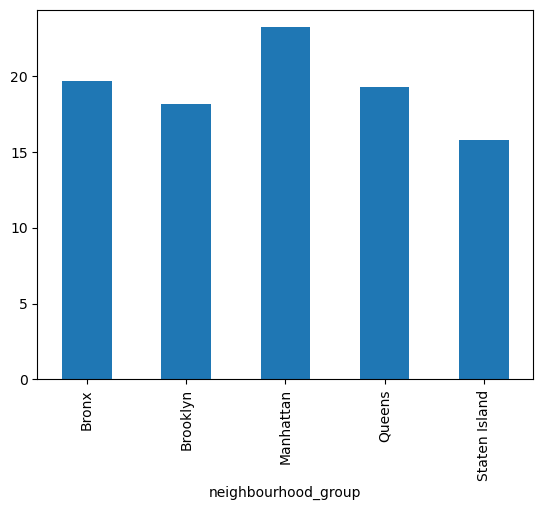

In [30]:
((data2.groupby('neighbourhood_group').neighbourhood_group.count() / 
  data1.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()

In [31]:
round((data2.groupby('neighbourhood_group').neighbourhood_group.count() /
  data1.groupby('neighbourhood_group').neighbourhood_group.count())*100,1).mean()

19.24

- Each neighbourhood_group has 19 % missing values in 'last_review' feature.

In [32]:
data2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,Very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,Very High,Very High,Very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,Very High,Very Low,Very Low,Very Low


#### MvA 'room_type' feature

In [33]:
# Count of 'room_type' with missing values

data3 = (data2.groupby('room_type').room_type.count() / data1.groupby('room_type').room_type.count())*100
data3

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

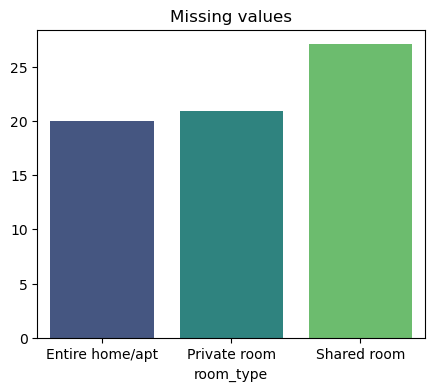

In [34]:
plt.figure(figsize=[5,4])
plt.title('Missing values')
sns.barplot(x = data3.index, y = data3.values, palette='viridis')
plt.show()

- 'Shared room' has the highest missing value percentage 27% for 'last_review' feature while to other room types has only about 20 %.

In [35]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', round(data1[data1['last_review'].isnull()].price.mean(),1))
print('Median = ', data1[data1['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', round(data1[data1['last_review'].notnull()].price.mean(), 1))
print('Median = ', data1[data1['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.3
Median =  101.0


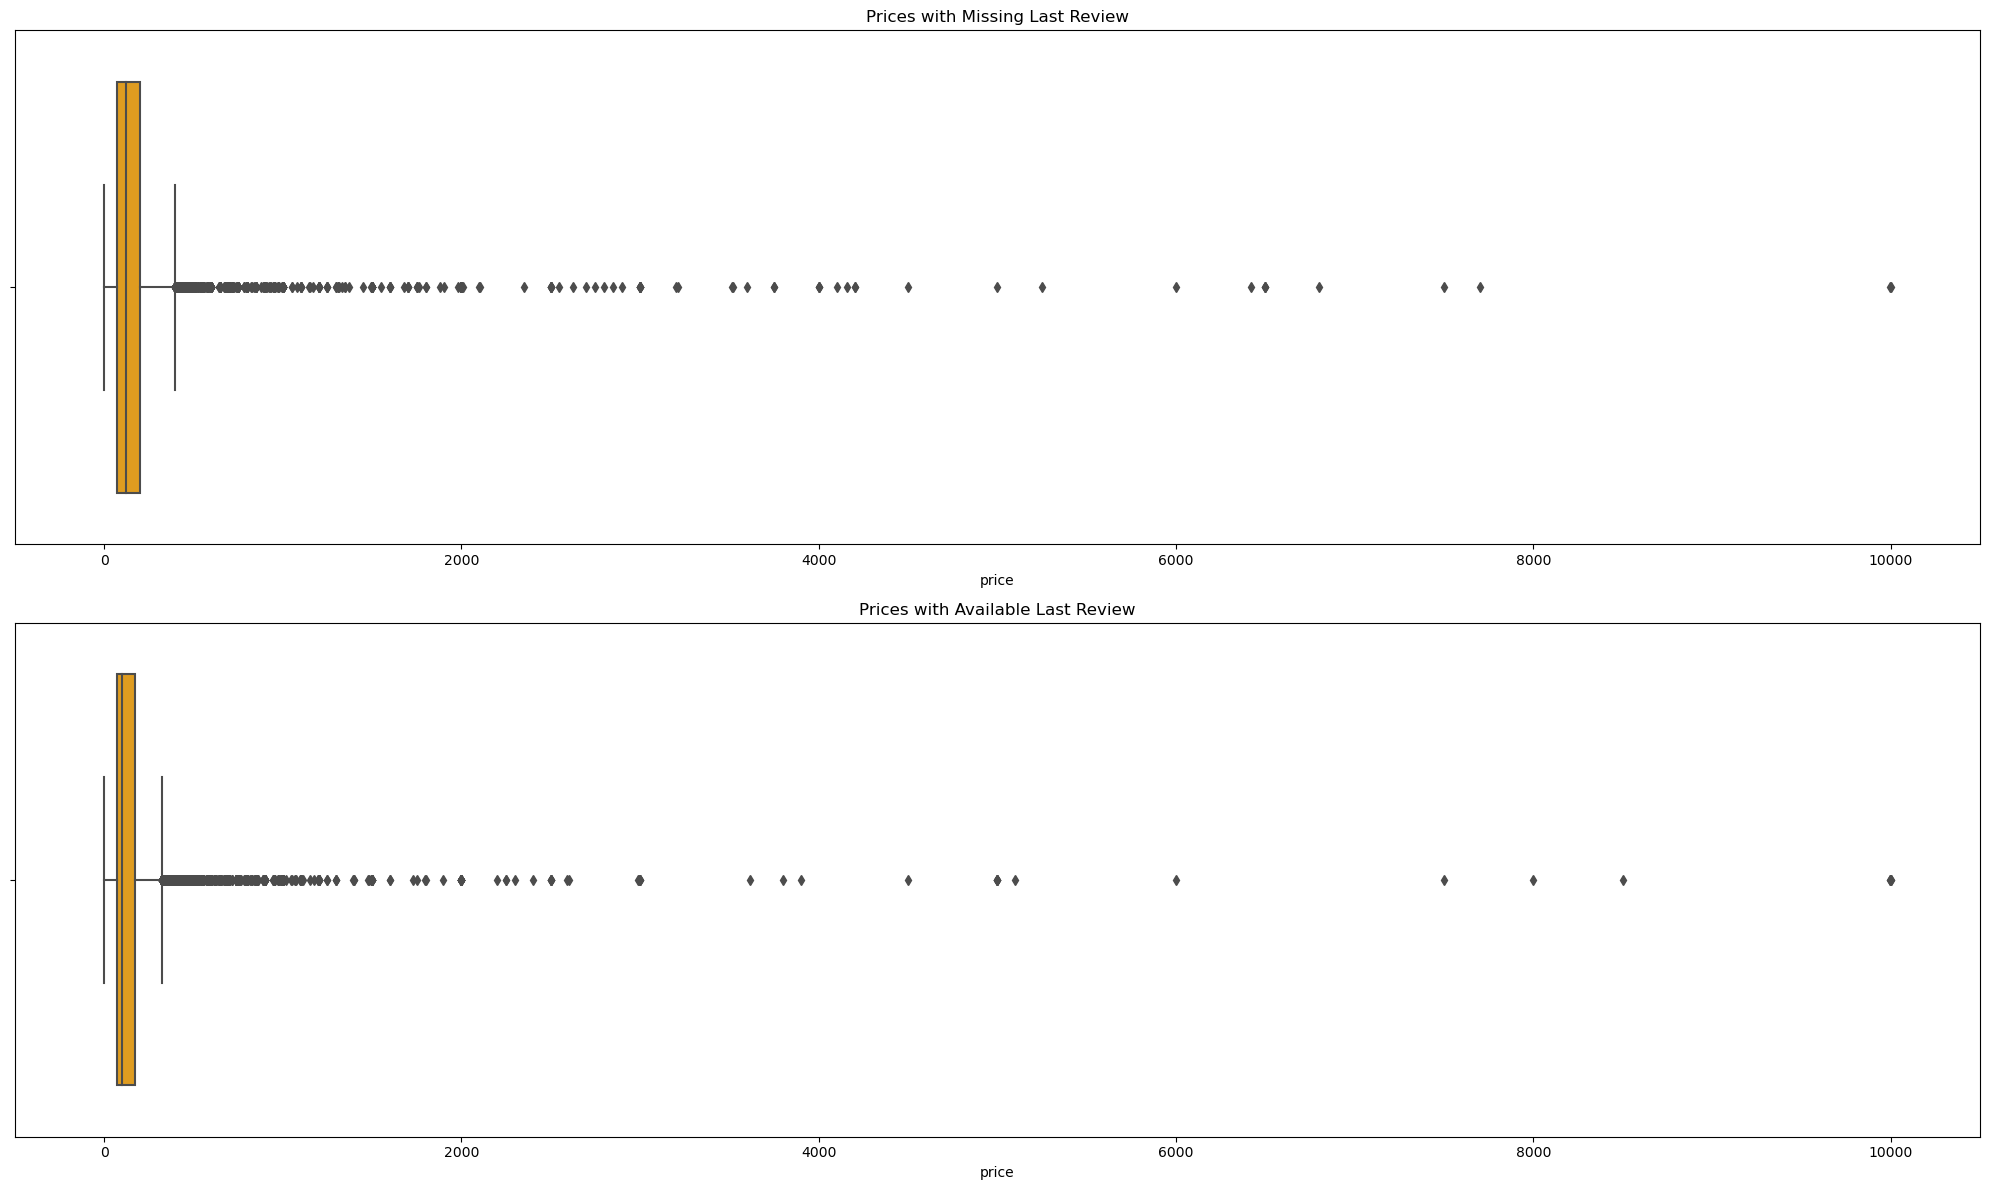

In [36]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
sns.boxplot(data=data1[data1['last_review'].isnull()], x='price', width=0.8, color='orange')
plt.title('Prices with Missing Last Review')

plt.subplot(2, 1, 2)
sns.boxplot(data=data1[data1['last_review'].notnull()], x='price', width=0.8, color='orange')
plt.title('Prices with Available Last Review')

plt.tight_layout()
plt.show()

### Analysis scenerio:

- The pricing is higher when 'last_review' feature is missing . 
- reviews are less likely to be given for shared rooms
- When the prices are high reviews are less likely to be given
- The above analysis seems to show that the missing values here are not MCAR (missing completely at random)


## Univariate Analysis:

In [37]:
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


### name

In [38]:
data1.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

### host_id

In [39]:
data1.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

### neighbourhood_group

In [40]:
data1.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [41]:
data1.neighbourhood_group.value_counts(normalize= True) * 100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

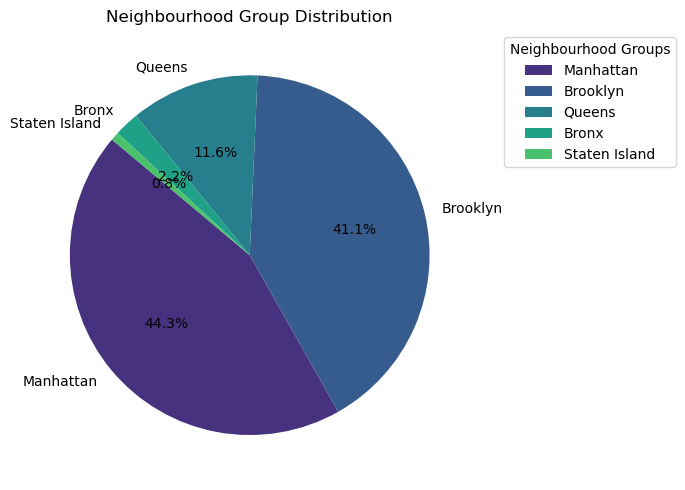

In [50]:
neighbourhood_counts = data1['neighbourhood_group'].value_counts(normalize=True) * 100
labels = neighbourhood_counts.index
sizes = neighbourhood_counts.values

colors = sns.color_palette('viridis')[0:len(labels)]  # Use a pastel color palette from Seaborn

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Neighbourhood Group Distribution')

plt.legend(title='Neighbourhood Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 85% of the listing are Manhattan and Brooklyn neighbourhood_group

### host_name

In [43]:
data1.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [44]:
data1.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

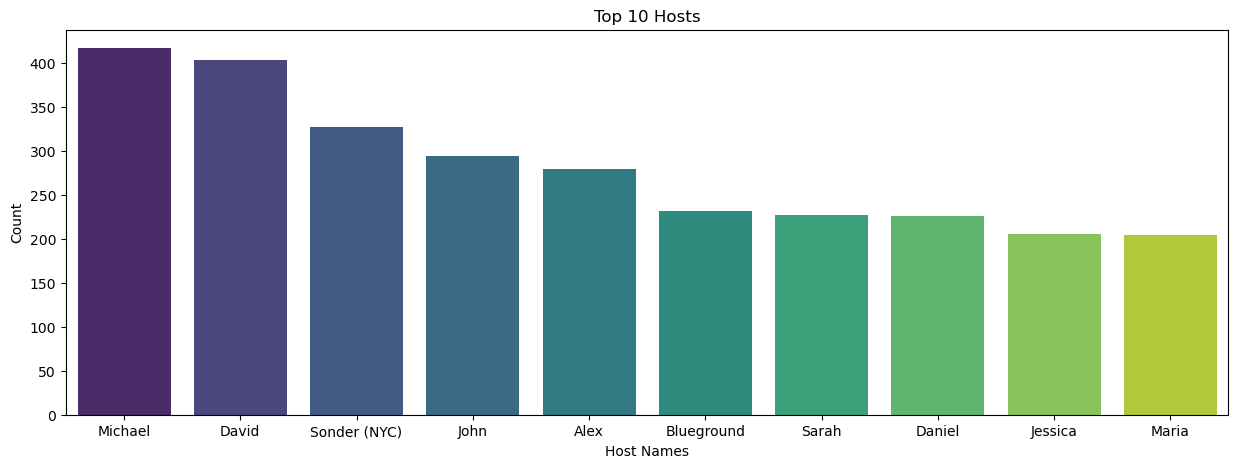

In [52]:
plt.figure(figsize=(15, 5))

sns.barplot(x=data1.host_name.value_counts().index[:10],
            y=data1.host_name.value_counts().values[:10],
            palette='viridis')

plt.title("Top 10 Hosts")
plt.xlabel("Host Names")
plt.ylabel("Count")
plt.show()

### neighbourhood

In [53]:
data1.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [54]:
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


### room_type

In [55]:
data1.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [56]:
data1.room_type.value_counts(normalize=True) * 100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

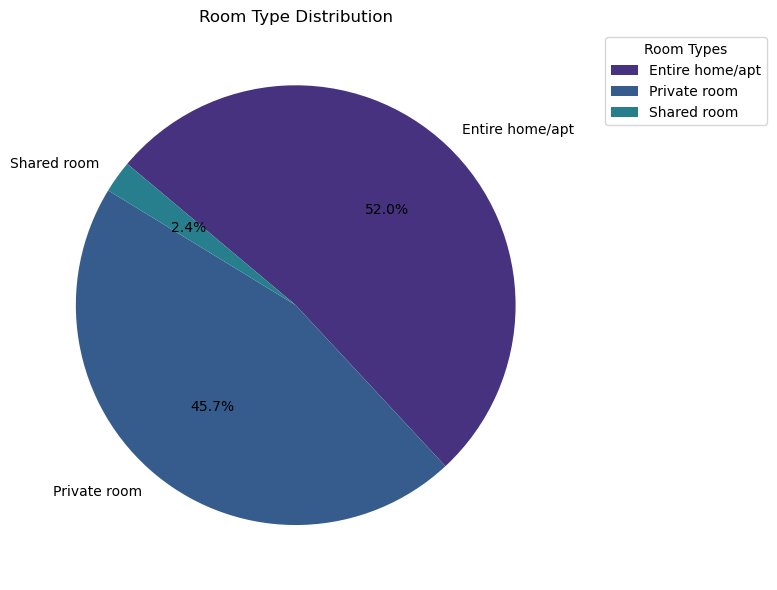

In [60]:
room_type_counts = data1['room_type'].value_counts(normalize=True) * 100
labels = room_type_counts.index
sizes = room_type_counts.values

# Define colors
colors = sns.color_palette('viridis')[0:len(labels)]  # Use a pastel color palette from Seaborn

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, counterclock=False)
plt.title('Room Type Distribution')
plt.legend(title='Room Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### price

In [61]:
data1.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

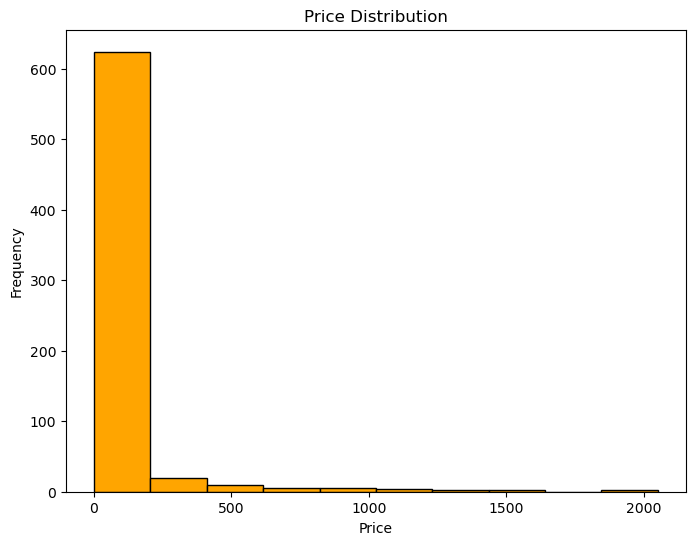

In [68]:
plt.figure(figsize=(8, 6))
data1.price.value_counts().plot.hist(color='orange', bins=10, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

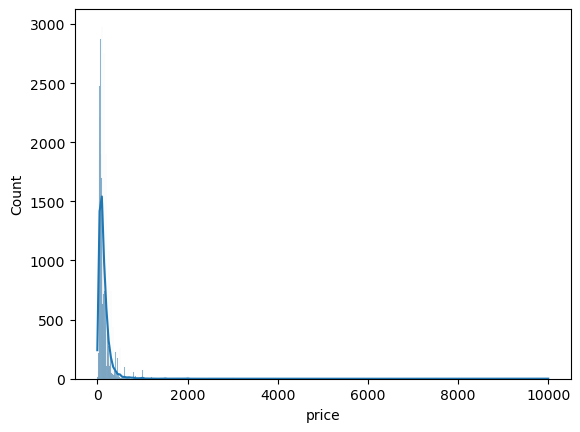

In [70]:
sns.histplot(data = data1.price,kde = True)

### minimum_nights

In [71]:
data1.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [72]:
data1.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

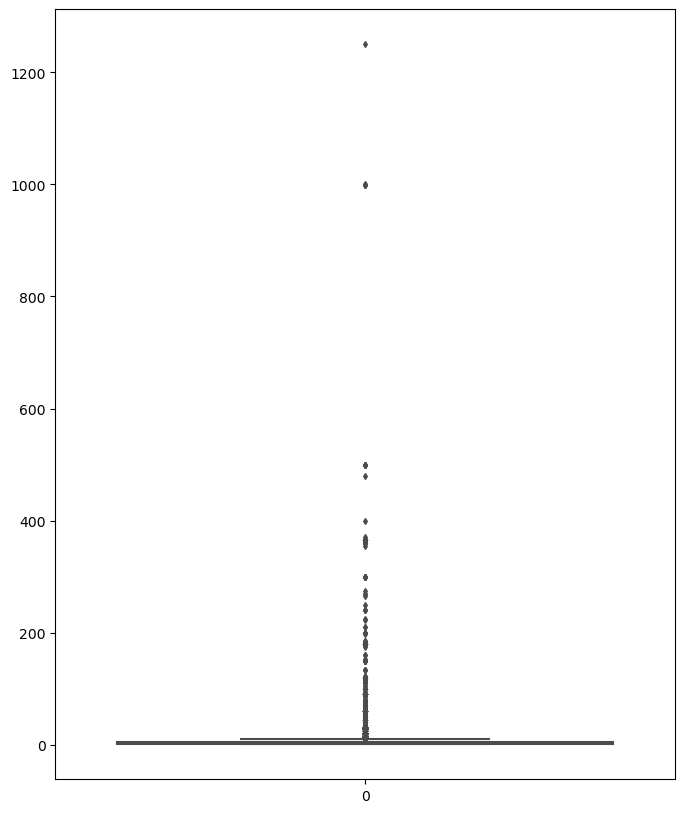

In [94]:
plt.figure(figsize=(8,10))
sns.boxplot(data = data1.minimum_nights,fliersize=3, color='orange')
plt.show()

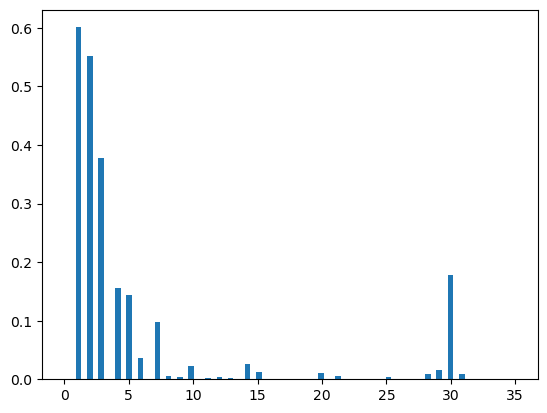

In [77]:
plt.hist(data = data1, x = 'minimum_nights',bins=80, range=(0,35), density=True)
plt.show()

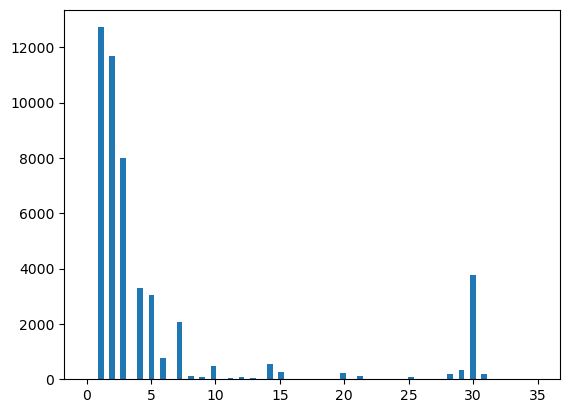

In [78]:
plt.hist(data = data1, x = 'minimum_nights',bins=80, range=(0,35))
plt.show()

### number_of_reviews

In [79]:
data1.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

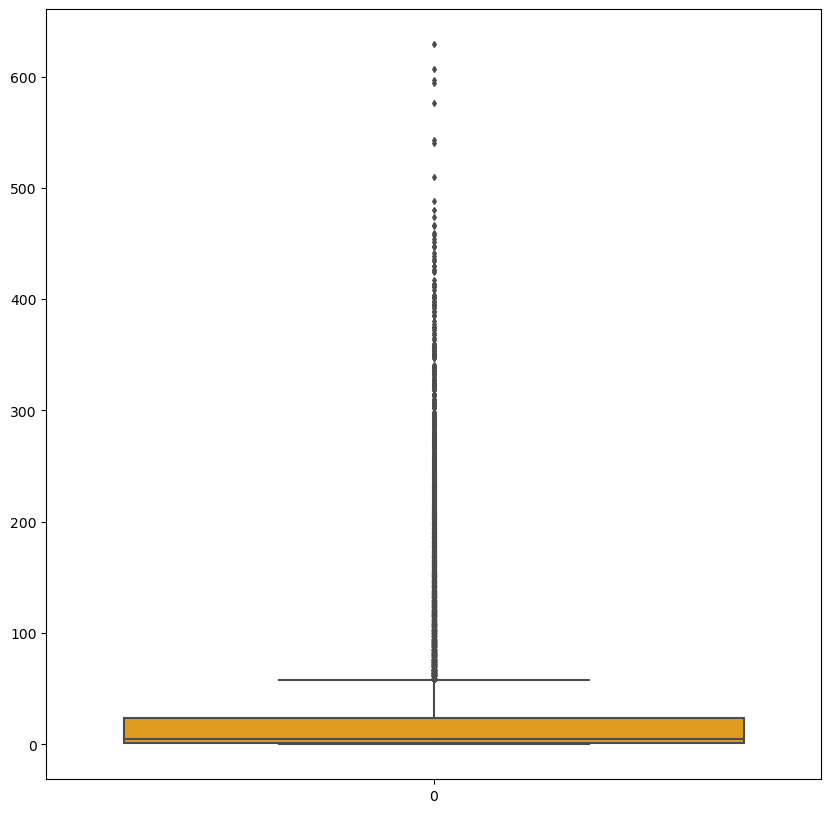

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data1.number_of_reviews,fliersize=3, color='orange')
plt.show()

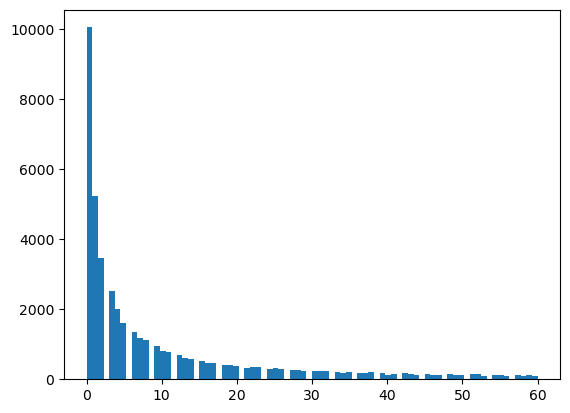

In [81]:
plt.hist(data = data1, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

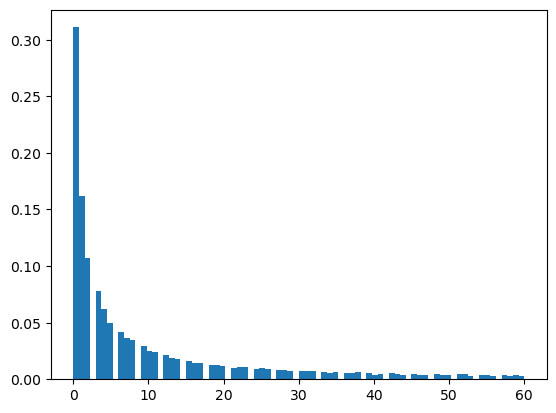

In [82]:
plt.hist(data = data1, x = 'number_of_reviews', bins=80, range=(0,60),density=True)
plt.show()

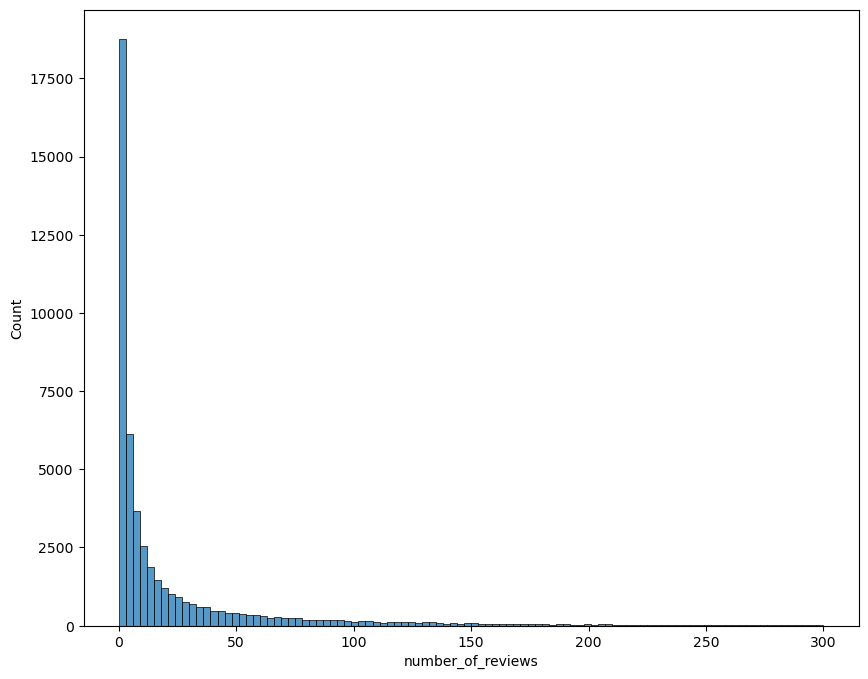

In [83]:
plt.figure(figsize = (10,8))
sns.histplot(data = data1, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

### reviews_per_month

In [85]:
data1.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

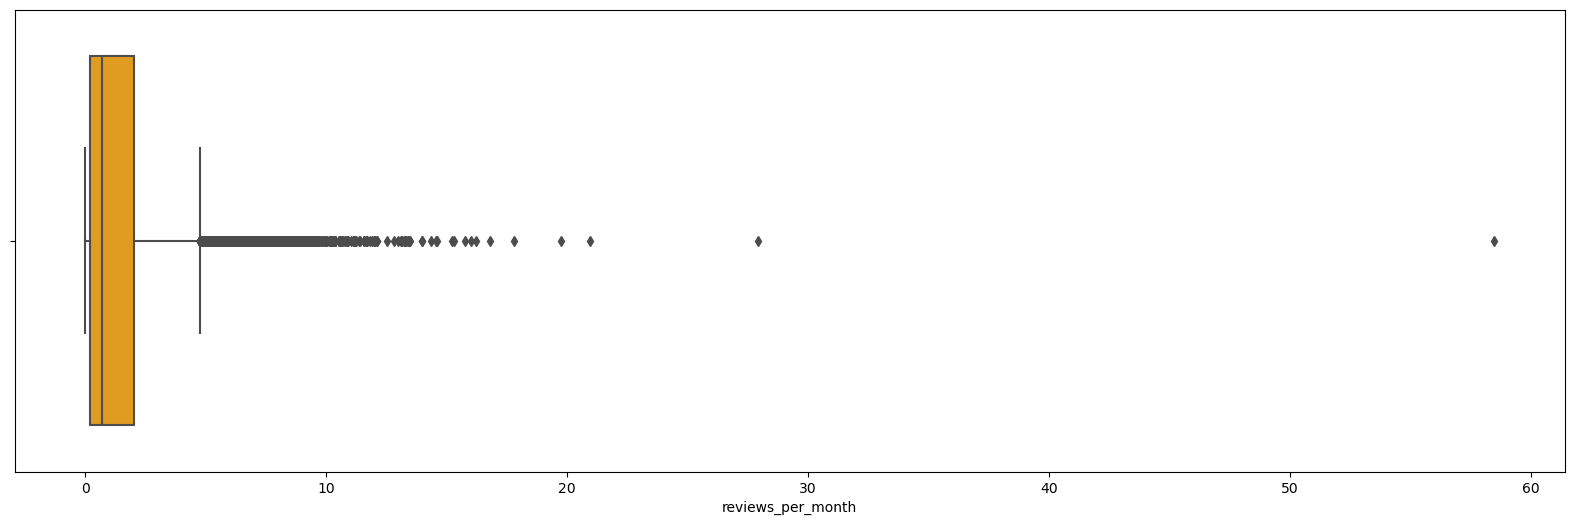

In [89]:
plt.figure(figsize = (20,6))
sns.boxplot(data = data1 , x = 'reviews_per_month', color='orange')
plt.show()



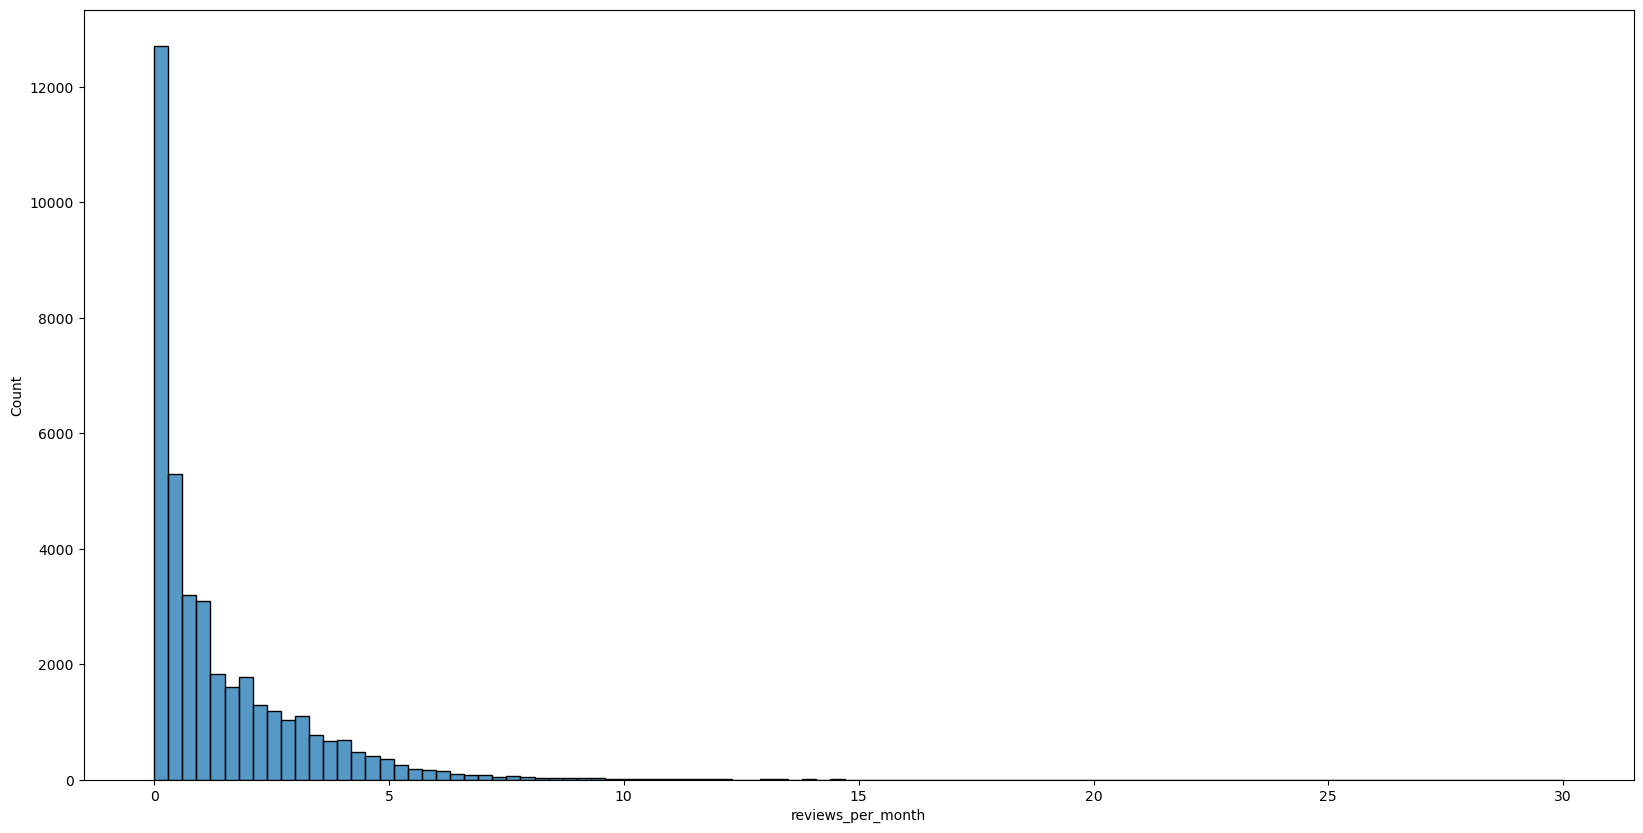

In [92]:
plt.figure(figsize = (20,10))
sns.histplot(data = data1, x = 'reviews_per_month', bins=100, binrange=(0,30))
plt.show()

### calculated_host_listings_count

In [95]:
data1.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

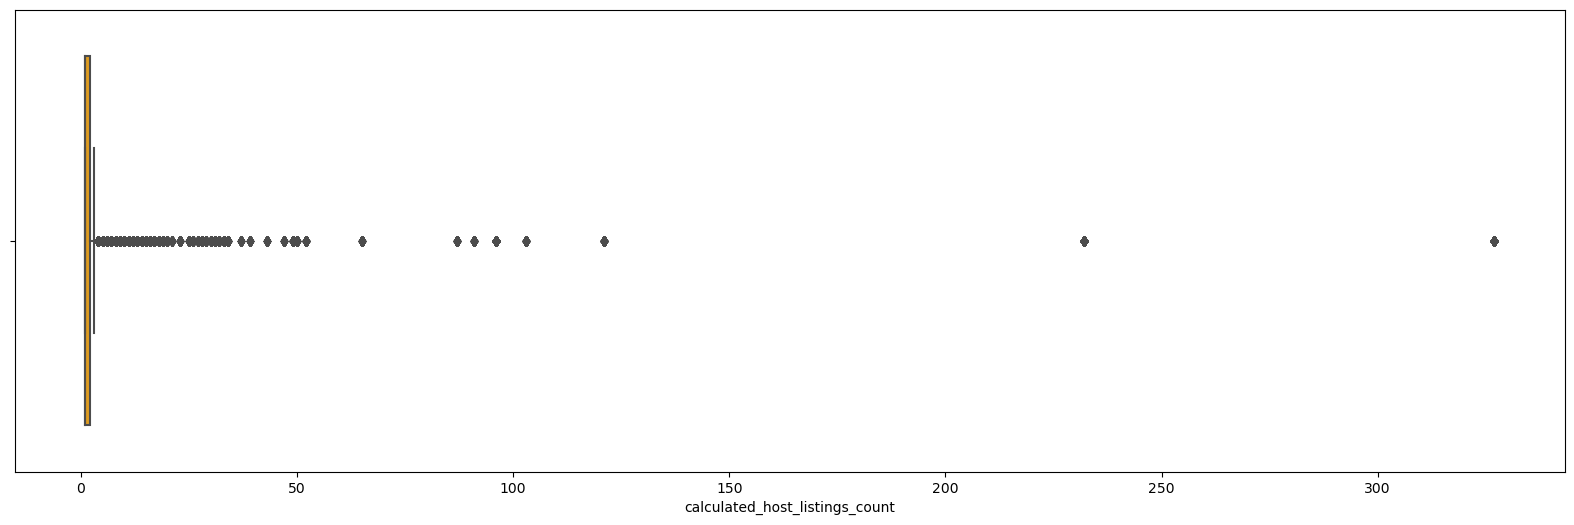

In [97]:
plt.figure(figsize = (20,6))
sns.boxplot(data = data1 , x = 'calculated_host_listings_count', color='orange')
plt.show()

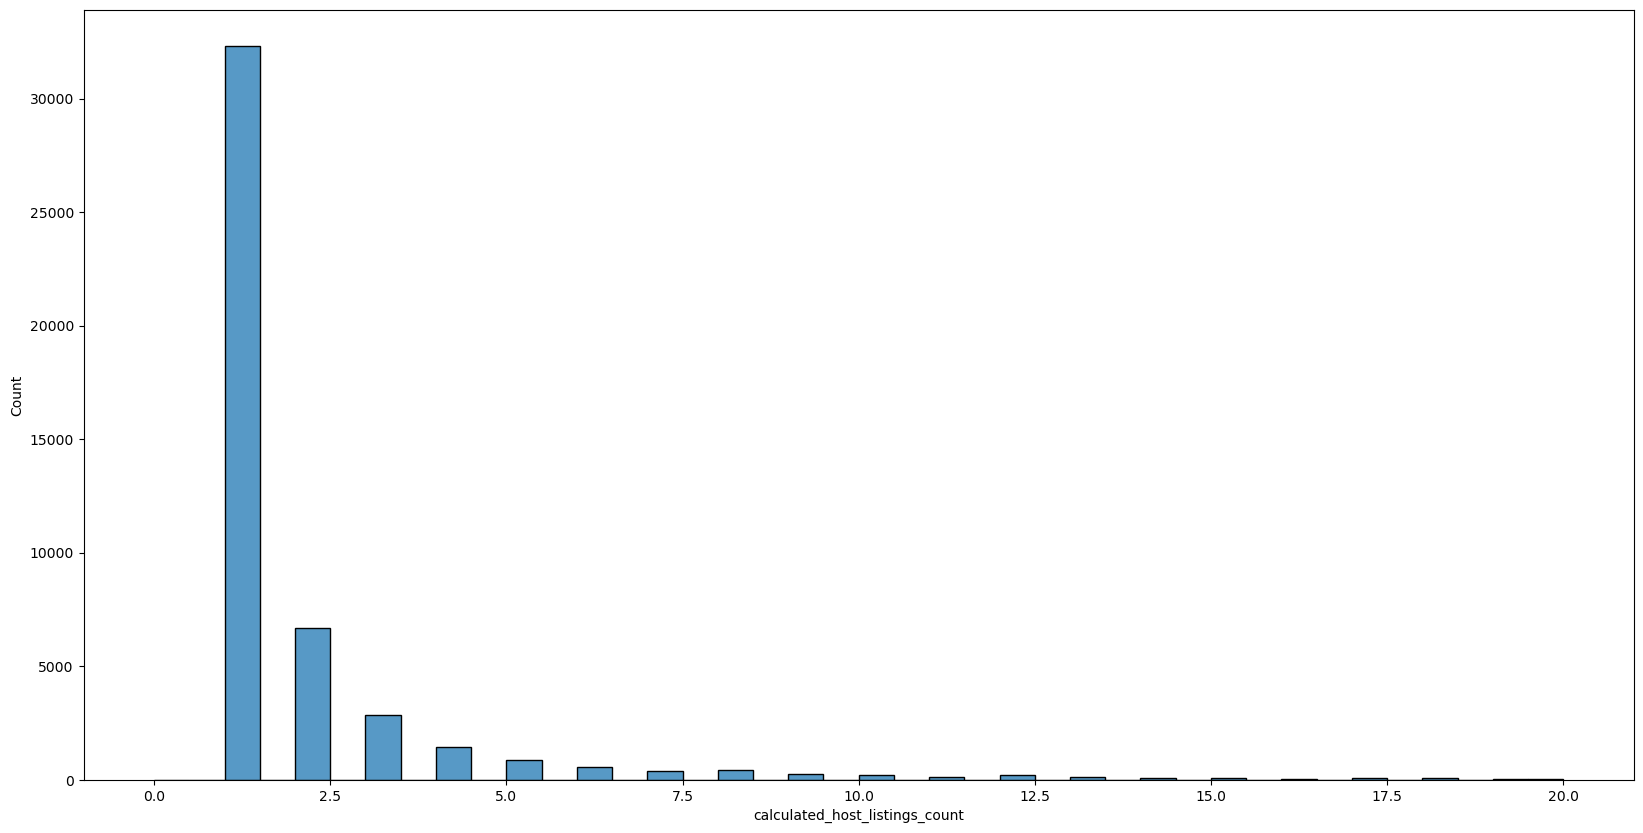

In [98]:
plt.figure(figsize = (20,10))
sns.histplot(data = data1, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

### availability_365

In [99]:
data1.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

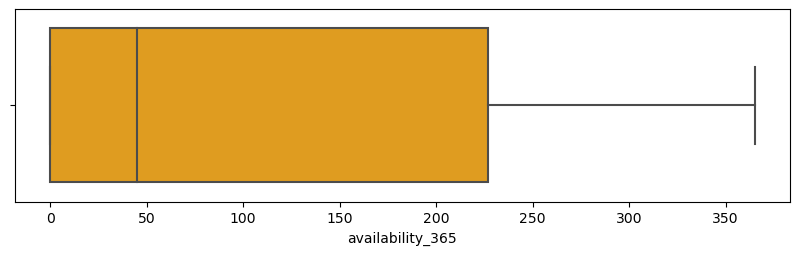

In [105]:
plt.figure(figsize = (10,2.5))
sns.boxplot(data = data1 , x = 'availability_365', color='orange')
plt.show()

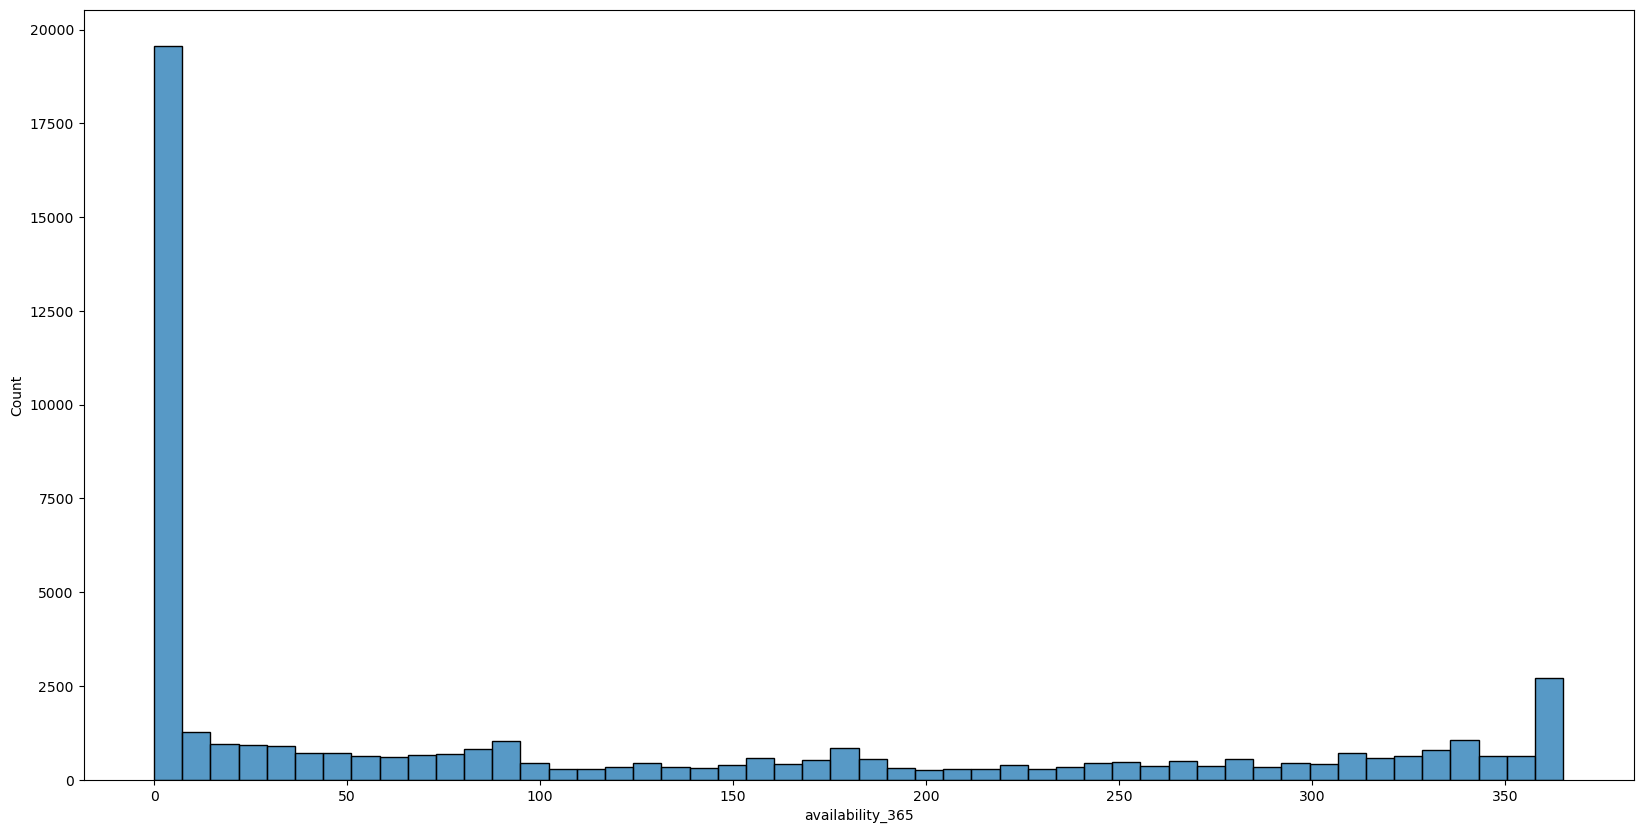

In [106]:
plt.figure(figsize = (20,10))
sns.histplot(data = data1, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

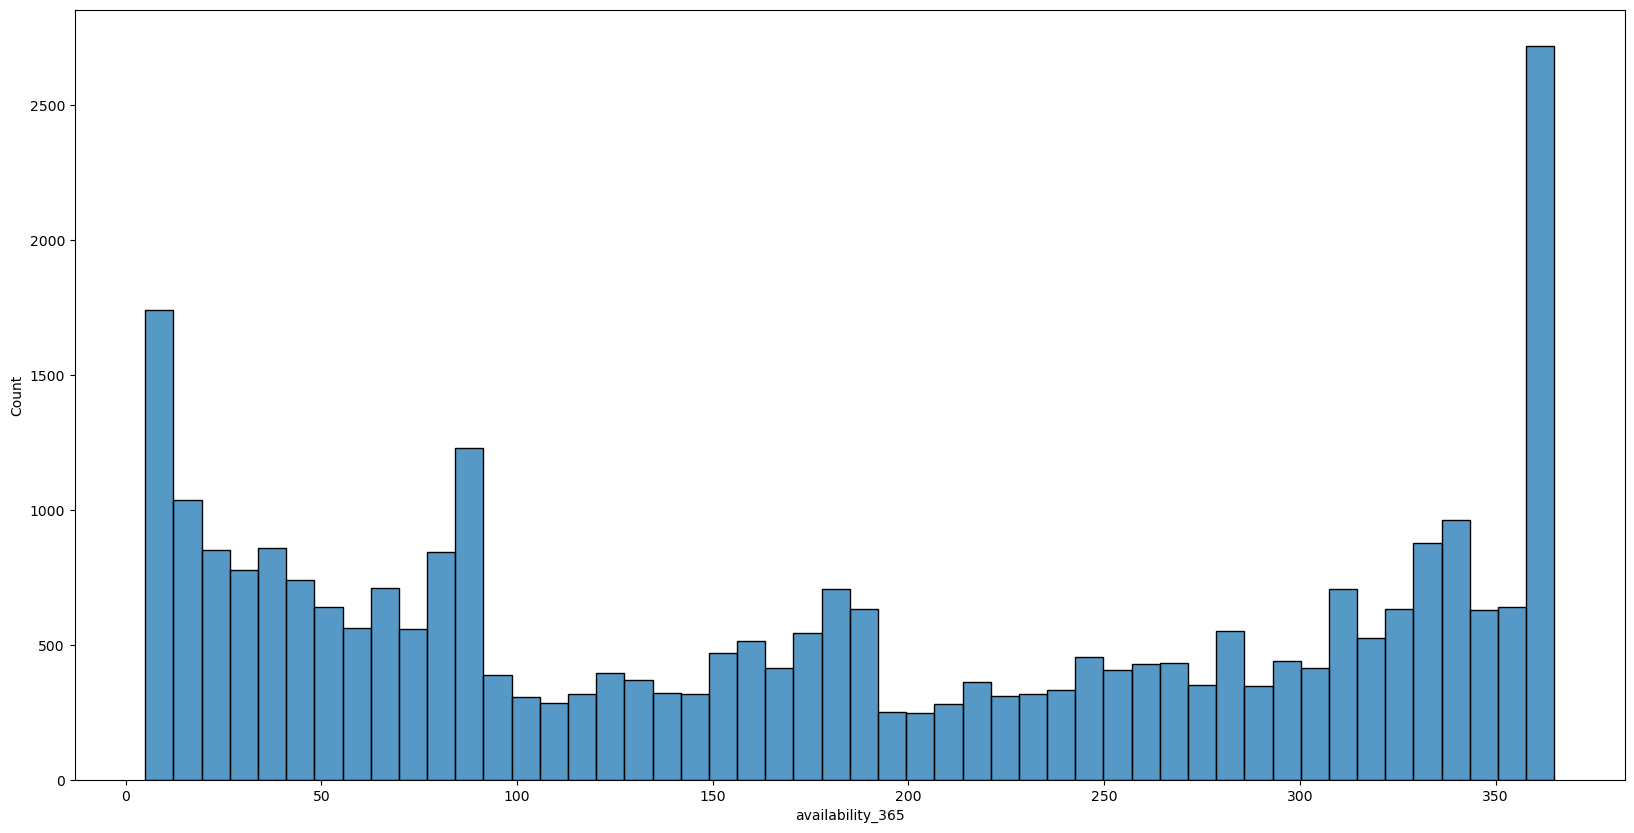

In [107]:
plt.figure(figsize = (20,10))
sns.histplot(data = data1, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

### number_of_reviews_categories

In [108]:
data1.number_of_reviews_categories.value_counts()

Low          26032
Very Low     12720
High          5893
Medium        3503
Very High      747
Name: number_of_reviews_categories, dtype: int64

In [109]:
data1.number_of_reviews_categories.value_counts(normalize=True)*100

Low          53.240618
Very Low     26.014930
High         12.052357
Medium        7.164332
Very High     1.527764
Name: number_of_reviews_categories, dtype: float64

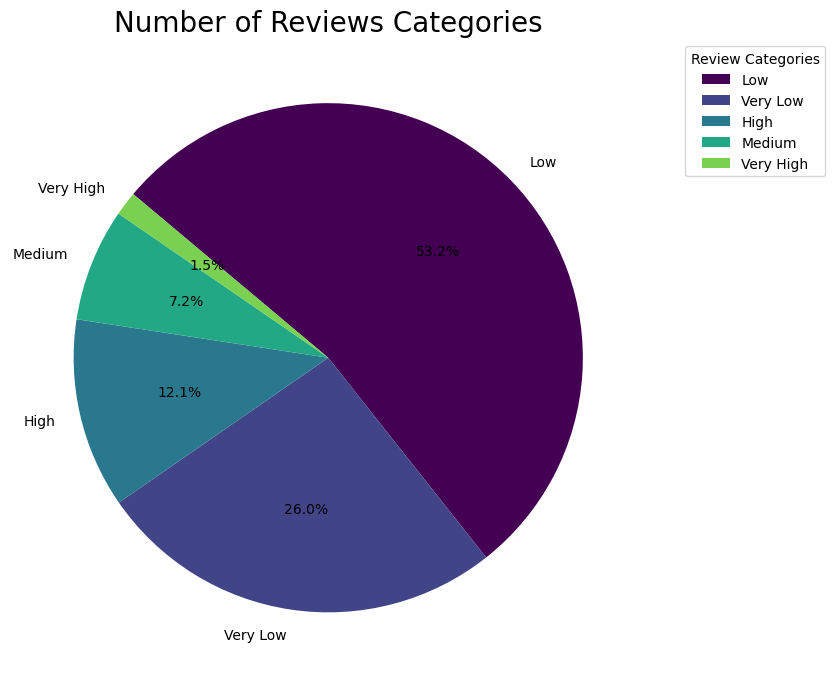

In [119]:
labels = counts.index
sizes = counts.values

cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(labels)) for i in range(len(labels))]

plt.figure(figsize=(8, 7))
plt.title('Number of Reviews Categories', fontdict={'fontsize': 20})
plt.pie(x=sizes,
        labels=labels,
        autopct='%1.1f%%',  
        colors=colors,  
        startangle=140,  
        counterclock=False) 

plt.legend(title='Review Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### minimum_night_categories

In [120]:
data1.minimum_night_categories.value_counts(normalize= True)*100

Low          40.280192
Very Low     26.014930
Very High    14.997444
Medium       12.960425
High          5.747009
Name: minimum_night_categories, dtype: float64

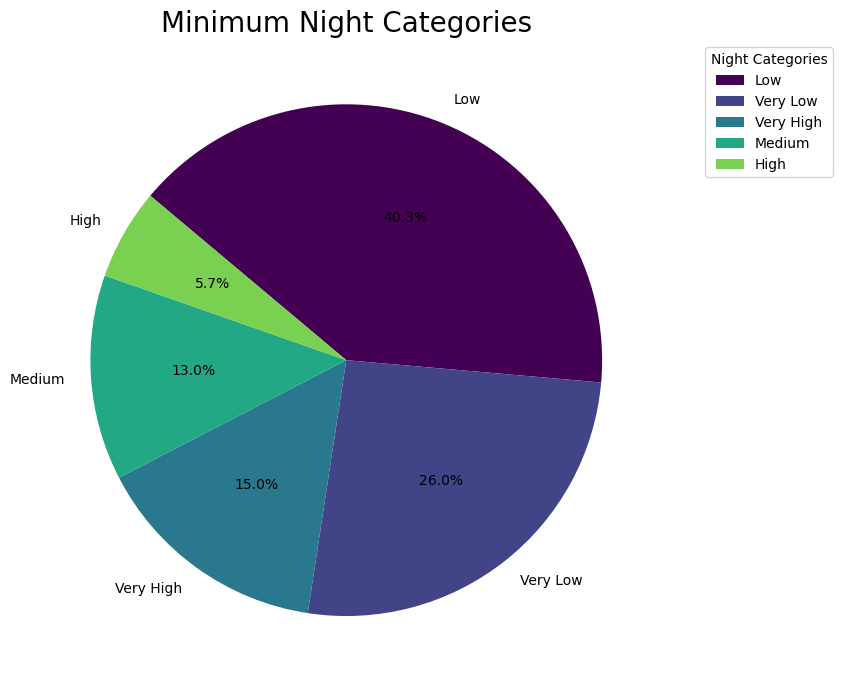

In [122]:
counts = data1.minimum_night_categories.value_counts()
labels = counts.index
sizes = counts.values

# Generate colors from the 'viridis' colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(labels)) for i in range(len(labels))]

# Create the pie chart
plt.figure(figsize=(12, 7))
plt.title('Minimum Night Categories', fontdict={'fontsize': 20})
plt.pie(x=sizes,
        labels=labels,
        autopct='%1.1f%%',  # Add percentage display
        colors=colors,  # Add colors
        startangle=140,  # Rotate the start angle for better visualization
        counterclock=False)  # Set the direction to clockwise

# Add the legend and move it outside the chart
plt.legend(title='Night Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### price_categories

In [123]:
data1['price_categories'].value_counts()

Low          22998
Very Low     12720
Medium        7556
High          5447
Very High      174
Name: price_categories, dtype: int64

In [124]:
data1['price_categories'].value_counts(normalize=True)*100

Low          47.035484
Very Low     26.014930
Medium       15.453523
High         11.140198
Very High     0.355865
Name: price_categories, dtype: float64

In [125]:
data1['price_categories'].describe()

count     48895
unique        5
top         Low
freq      22998
Name: price_categories, dtype: object

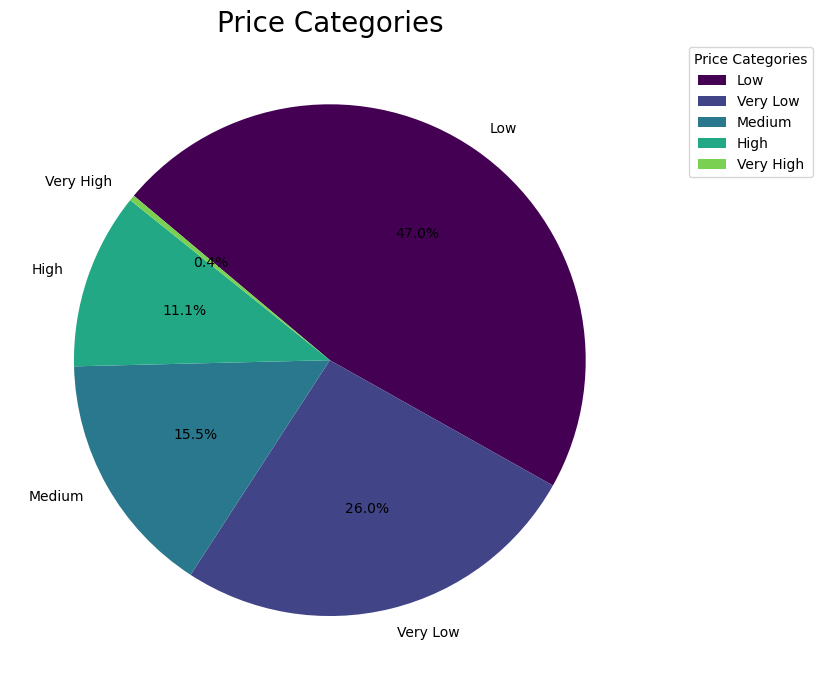

In [126]:
counts = data1.price_categories.value_counts()
labels = counts.index
sizes = counts.values

# Generate colors from the 'viridis' colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(labels)) for i in range(len(labels))]

# Create the pie chart
plt.figure(figsize=(12, 7))
plt.title('Price Categories', fontdict={'fontsize': 20})
plt.pie(x=sizes,
        labels=labels,
        autopct='%1.1f%%',  # Add percentage display
        colors=colors,  # Add colors
        startangle=140,  # Rotate the start angle for better visualization
        counterclock=False)  # Set the direction to clockwise

# Add the legend and move it outside the chart
plt.legend(title='Price Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [127]:
# let's sum up Very Low and Low prices:

47 + 26

73

- Customers prefer Low prices followed by Very Low prices.

## Bivariate and Multivariate Analysis

## Let's find Correlations:

In [128]:
data1[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [129]:
data1[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


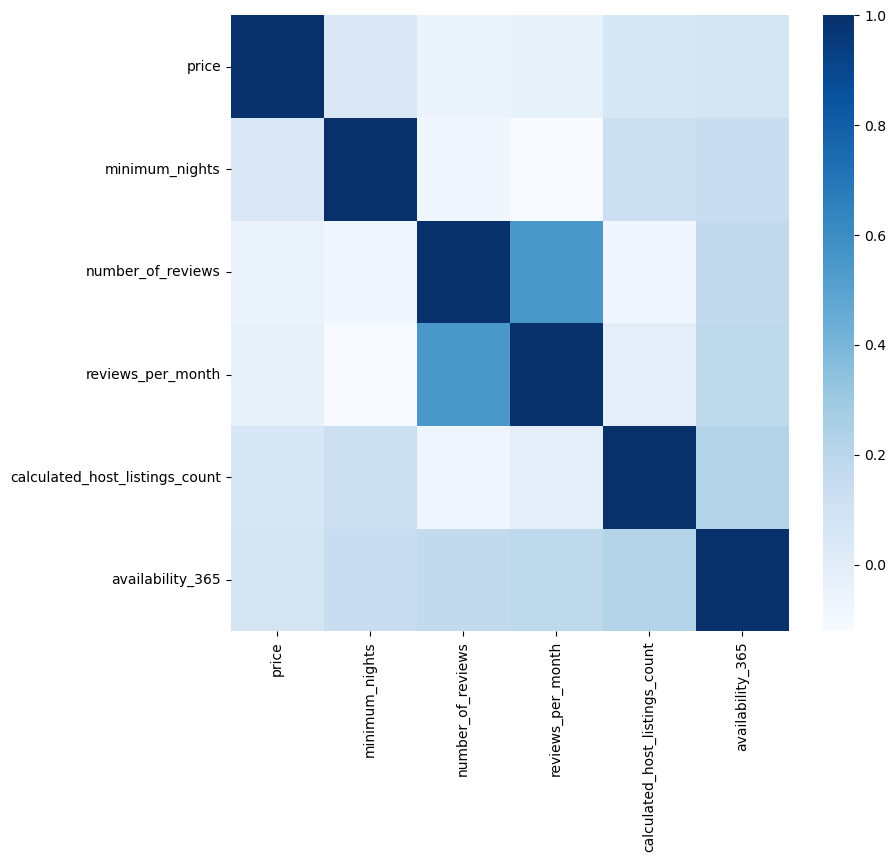

In [139]:
plt.figure(figsize=(9,8))
sns.heatmap(data = data1[numerical_columns].corr(), cmap='Blues')
plt.show()

## Finding Top correlations

In [140]:
corr_matrix = data1[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [141]:
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.121702,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.549868,0.072376,0.172028
reviews_per_month,0.030608,0.121702,0.549868,1.000000,0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,0.072376,0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [142]:
sol

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                number_of_reviews                 0.047954
                                minimum_nights                    0.042799
                         

In [143]:
# Top correlations

sol[1:8]

calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
dtype: float64

## number_of_reviews_categories and prices

In [144]:
# prices for each of reviews_categories

x1 = data1.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
Very Low     1806531
High          971346
Medium        508647
Very High     178431
Name: price, dtype: int64

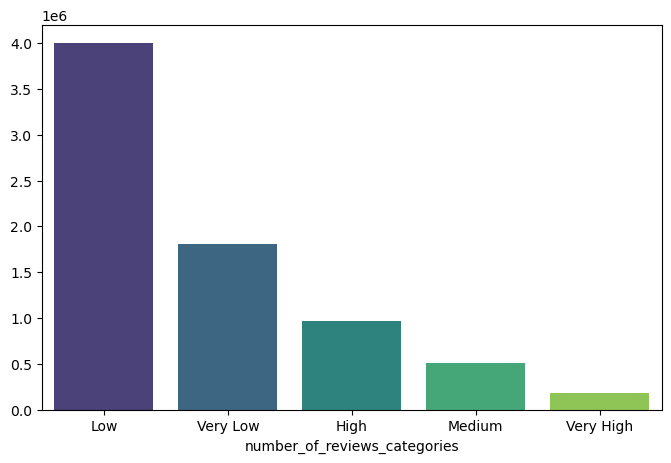

In [146]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values, palette='viridis')
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

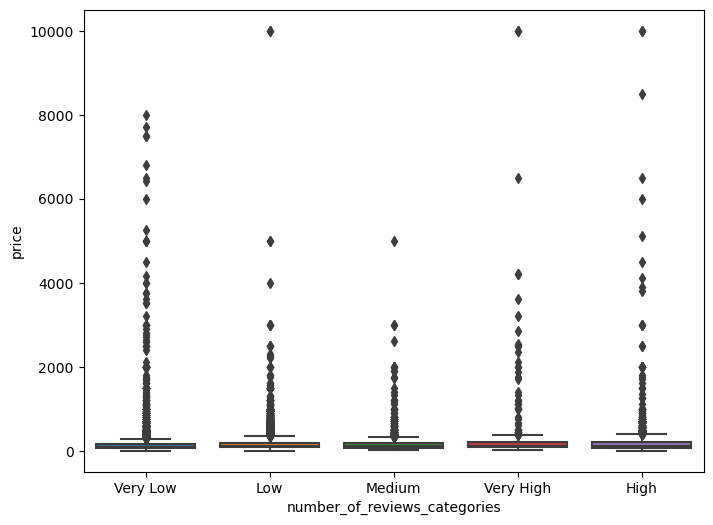

In [148]:
plt.figure(figsize=(8,6))
sns.boxplot(x = data1.number_of_reviews_categories , y = data1.price)

In [149]:
data1.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
Very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
Very High    238.863454
Name: price, dtype: float64

In [150]:
data1.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
Very Low      90.0
Medium       105.0
High         120.0
Low          120.0
Very High    120.0
Name: price, dtype: float64

In [151]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,Very Low,1806531
2,High,971346
3,Medium,508647
4,Very High,178431


In [152]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
Very High     2.389505
Medium        6.811679
High         13.008033
Very Low     24.192631
Low          53.598152
Name: price, dtype: float64

- The total price for 'Low' or 'very Low' number_of_reviews_categories are high.

## ('room_type' and  'number_of_reviews_categories') 

In [153]:
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


In [154]:
data1.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [155]:
pd.crosstab(data1['room_type'], data1['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,Very High,Very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [156]:
data1.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [158]:
data1.groupby('room_type').number_of_reviews.sum() / data1.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

- Shared room has less reviews 16%.
- Entire home/apt has more reviews than rest of them.

## room_type' and 'price_categories

In [159]:
pd.crosstab(data1['room_type'], data1['price_categories'])

price_categories,High,Low,Medium,Very High,Very Low
room_type,,,,,
Entire home/apt,3714,13086,4262,120,4227
Private room,1620,9597,3170,52,7887
Shared room,113,315,124,2,606


### 'room_type' and 'reviews_per_month'

In [160]:
data1.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [163]:
data1.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

In [164]:
data1.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.66
Private room       0.77
Shared room        0.98
Name: reviews_per_month, dtype: float64

In [165]:
data1.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

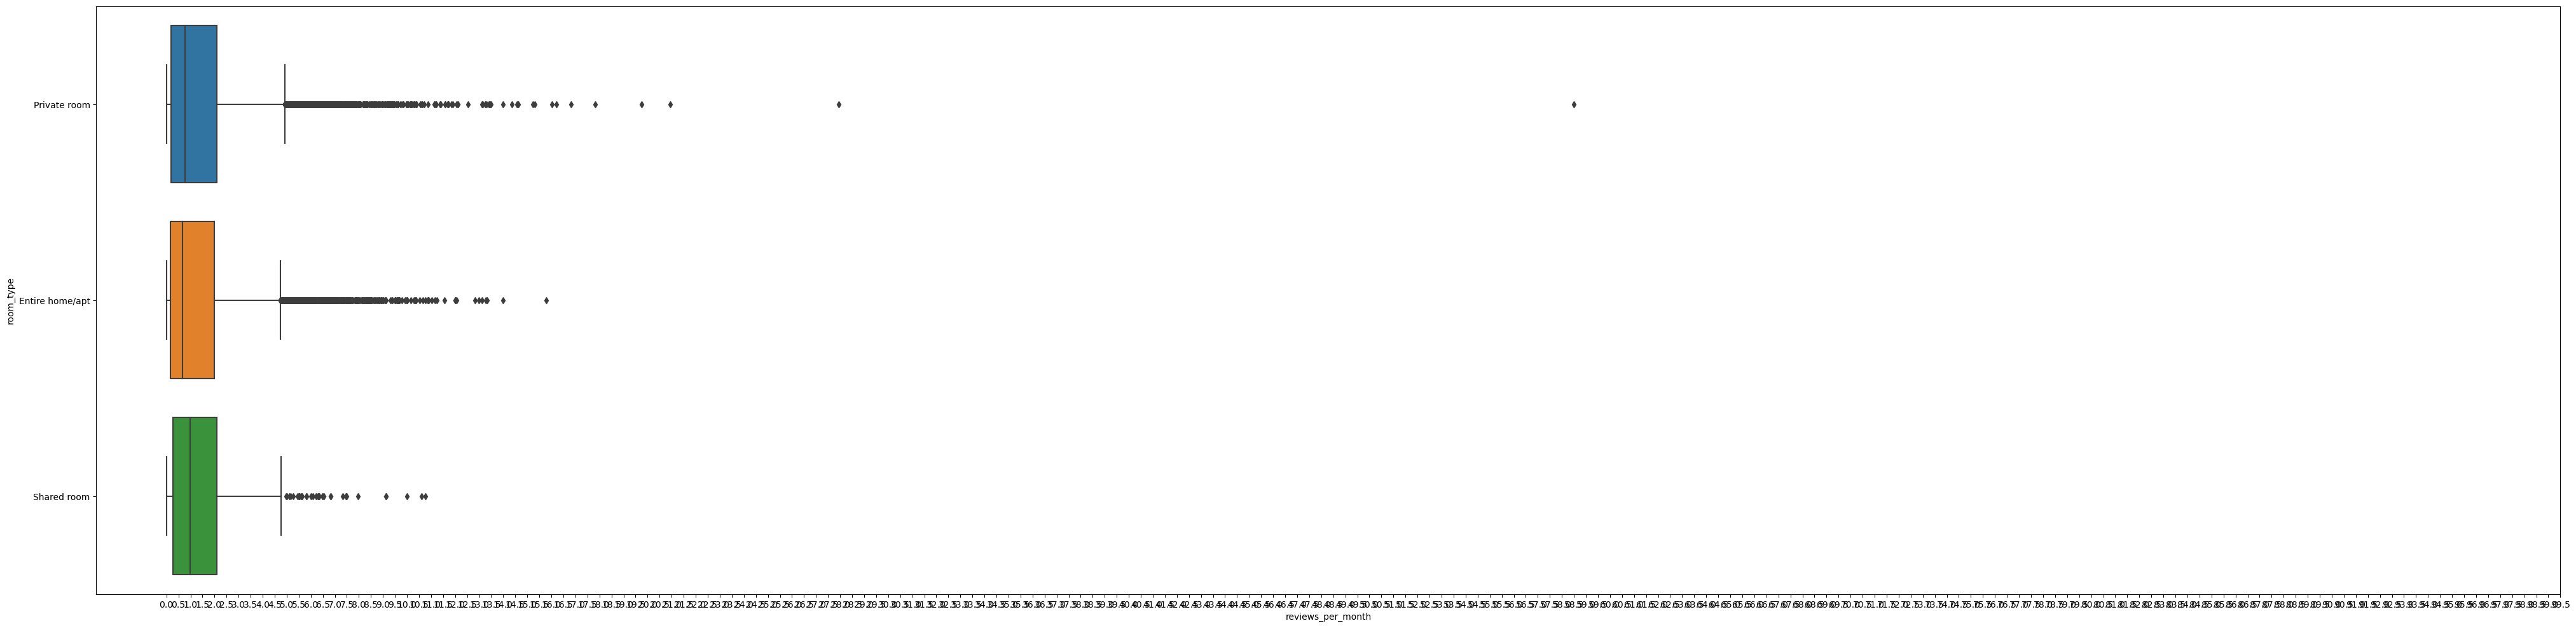

In [169]:
plt.figure(figsize=(50,12))
sns.boxplot(data = data1, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

### let's plot violin plot to understand better

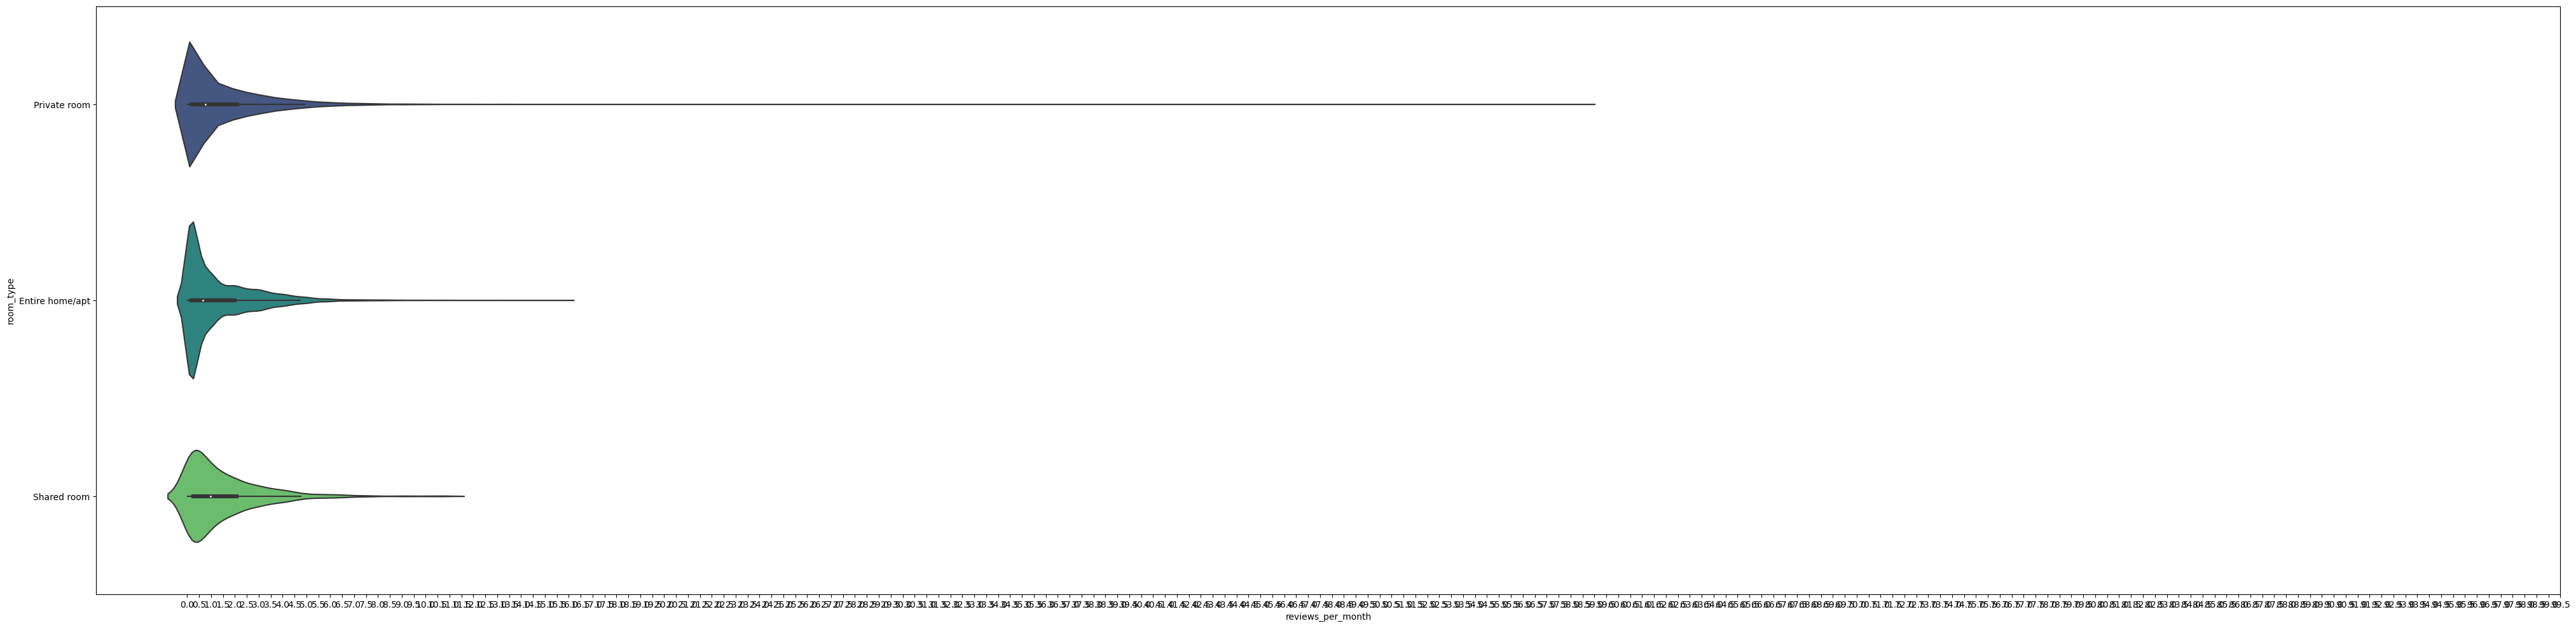

In [176]:
plt.figure(figsize=(50, 12))
sns.violinplot(data=data1, y='room_type', x='reviews_per_month', palette='viridis')

plt.xticks(np.arange(0, 100, 0.5))
plt.show()

- 1.5 is the average reviews for each room type.

### minimum_night_categories and reviews_per_month

In [177]:
data1.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
Very High     2235.19
Medium        4689.73
Very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

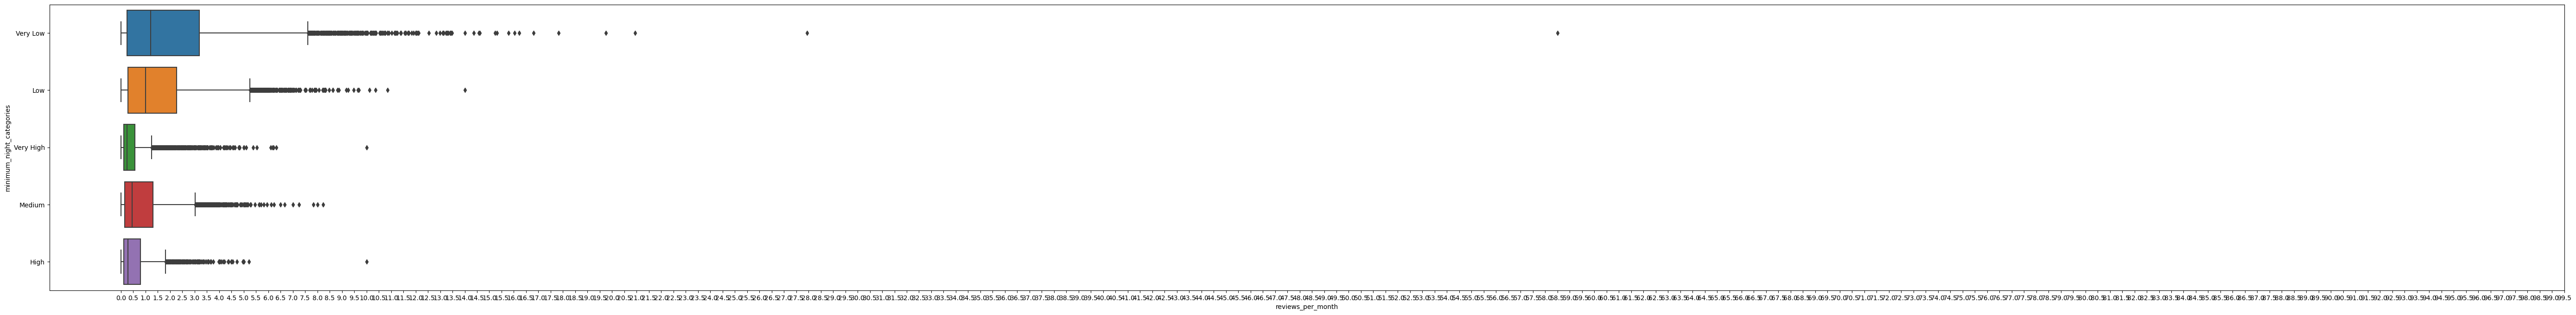

In [180]:
plt.figure(figsize=(70,8))
sns.boxplot(data = data1, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

- Customer's are more likely to leave reviews for low number of minimum nights
- minimum_nights should be on the lower side to make properties more customer-oriented

## 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [181]:
data1.availability_365_categories.value_counts()

Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

In [182]:
pd.DataFrame(data1.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       0.598431
                            Low                        2.200373
                            Medium                     1.056111
                            Very High                  0.342308
                            Very Low                   3.289381
Low                         High                       0.638307
                            Low                        1.783956
                            Medium                     0.883844
                            Very High                  0.803750
                            Very Low                   2.896114
Medium                      High                       0.591070
                            Low                        1.993565
                            Medium                     1.157492
                            Very High                  0.517500
                            Very Low                   2.893918
Very High                   High                       0.428464
                            Low                        1.490562
                            Medium                     0.694283
                            Very High                  0.276571
                            Very Low                   2.206077
Very Low                    High                       0.337780
                            Low                        0.506051
                            Medium                     0.276970
                            Very High                  0.480588
                            Very Low                   0.673759

- Properties with high availability and low price tend to receive more reviews.
- Conversely, properties with high availability and high price typically have lower review rates.